# Theta gang strategy note

**Note** this is only for personal use, if you see this it means I shered it to you in good faith but be mindful that I made this for personal use and not as tutorial

The note is based on the series of videos starting with [this](https://www.youtube.com/watch?v=OyAOaZOTwq4) film on youtube.

He referenced [this](https://thetagang.com/) website as a source of more knowledge. Probably there you can find even deeper dive into the strategy.

## Covered Calls

### What is a Call?

Call is an option. Options are contracts between buyer and seller.

Buyer pays a premium to the option seller.

Buyer can then execute the option and purchase 100 shares of stock at a strike price on or before expiration.

**Seller** accepts the obligation **to sell** a 100 units of the underlying asset at the strike price before expiration.

### How do calls behave?

In practice we want to not be assigned and keep both the stock and the premium. Because of that we want to sell the call **above** the price that the stock is currently at.

The **higher** the strike price the **lower** the premium but the probability of assigment is lower.

The longer the expiration date the higher the premium. However, intuitively, the longer we wait, the more likely it is that we get assigned.

### How do we exercise the knowledge in practice?

1. buy 100 units of the underlying (eg. stock of a company) **Make sure it is optionable!**
2. sell a call with strike price above purchase price

Since you own the stock then you want it to go to the moon but not above the call strike because of the alternative cost theory. 

## Cash Covered Put

### What is a Put?

Put is an option. Options are contracts between buyer and seller.

Buyer pays a premium to the option seller.

Buyer can then execute the option and sell 100 shares of stock at a strike price on or before expiration.

**Seller** accepts the obligation **to buy** a 100 units of the underlying asset at the strike price before expiration.

### How do puts behave?

In practice we want to not be assigned and keep both the cash and the premium. Because of that we want to **sell the put below** the price that the stock is currently at.

The lower the strike price the higher the premium but the probability of assigment is lower.

The longer the expiration date the higher the premium. However, intuitively, the longer we wait, the more likely it is that we get assigned.

### How do we exercise the knowledge in practice?

1. Have a pile of cash to start investing.
2. Choose an underlying asset like stocks that you want to hold longterm **Make sure it is optionable!**
3. Sell a put with strike price below current price

Since you don't own the stock then you want it to go to as low as possible but also just above the strike because then you get assigned to buy shares above their value.

## Wheel

## What is a wheel?

Wheel represents a cycle of using the Cash Covered Put and with Covered Call strategies

1. You start by going through steps of Cash Covered Put. 
1. If you dont get assigned, sell Put again.
1. If you do get assigned, proceed to Covered Call.
1. If you dont get assigned, sell Call again.
1. If you do get assigned, you have come full circle, but your cash stash is bigger.


## Risks

So far, all this is a pipe dream where the stock always recoveres and we can keep doing this

However, if the stock drops in valuation and we are holding it's shares then we are in big trouble.

Now, we would be in the same trouble if we "just" bought the stock without this steps but the risk is still real.

## Risk mitigation

To limit our exposure to risk to some concrete value, instead of 100% of the stock price (minus the premiums) we can exercise the 
Put Credit Spread strategy.

## Put Credit Spread

Basicaly the same as the Cash Covered Puts but with the added element of downside protection.

Funny thing: we will actually use Puts the way they were designed to be used! (To limit the downside protection)

During step 3 of Cash Covered Put: "Sell a put with strike price below current price", we also buy a put with further OTM strike. This way if we get assigned when the stock tanks, then we have a capped limit to the difference of the premiums.

## Visulalisations

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def Stock(x):
    return x


def pipe(*funcs):
    def inner(x):
        for func in funcs:
            x = func(x)
        return x
    return inner


def Call(mode: str, strike_price: int, premium: int):
    def inner(x):
        x = x - strike_price
        if mode == "buy":
            return np.maximum(x, 0) - premium - strike_price
        return np.minimum(x, 0) + premium + strike_price
    return inner


def Put(mode: str, strike_price: int, premium: int):
    def inner(x):
        x = x - strike_price
        if mode == "buy":
            return np.maximum(x, 0) - premium + strike_price
        return np.minimum(x, 0) + premium
    return inner


def PutCreditSpread(zipped_strikes_premiums):
    buy, sell = zipped_strikes_premiums
    buy_strike, buy_premium = buy
    sell_strike, sell_premium = sell
    return pipe(
        Put("buy", buy_strike, buy_premium),
        Put("sell", sell_strike, sell_premium)
    )


x = np.linspace(-3, 3, 512)

In [4]:
def make_graph(x, func, shift=30, color=None):
    y = func(x)
    x = x + shift
    if color is None:
        color = np.where(y > 0, 'green', np.where(y < 0, 'red', 'black'))
    plt.scatter(x, y, color=color, label='y(x)', s=0.2)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.plot(x, Stock(x) - shift, color='blue', linestyle='--')

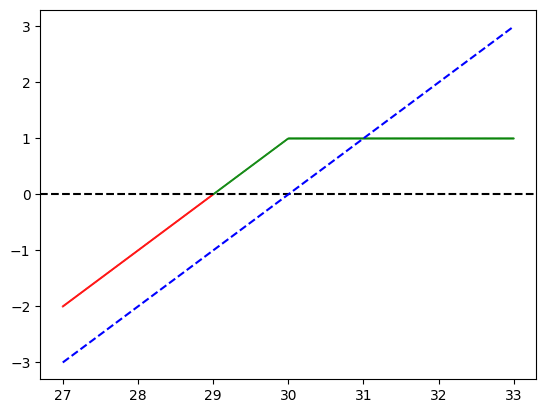

In [7]:
make_graph(x, Put('sell', 0, 1))

**Interpretation**: 
Recall that when we sell the put we accept to buy at x price. Here, price agreed to is 30.

When price is **>30** then it makes no sense to "force" us to buy assets for 30$ 
since the client can just sell it to anyone else on the open market. 
Thus, we only **keep the premium** and **do not get assigned**.

When price is **<30** then it makes sence from the buyer to execute the option because now, 
the price on the open market is smaller, thus we have to buy from him for 30 even tho, currently it is valued lower than this.
Thus, **we buy shares**, and are exposed to the drop in price.

**Notice**, there is a period where the premium counteracts the effect of the drop in price

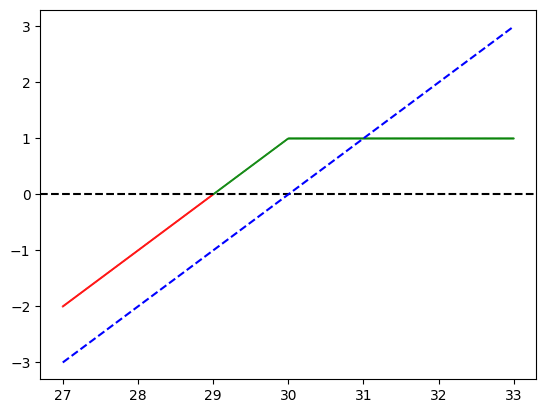

In [236]:
make_graph(x, Call('sell', 0, 1))

**Interpretation**: 
Recall that when we sell the call we accept to sell at x price. Here, price agreed to is 30.

When price is **>30** then it makes sense to "force" us to sell assets for 30$ 
since the client can just sell it to anyone else on the open market just after (lets say current OTM price is 32, then he buys the stock from us for 30 and sells it for 32).
Thus, we only **keep the premium** but **get assigned** so our total gain is capped.

When price is **<30** then it makes no sence from the buyer to execute the option because now, 
the price on the open market is smaller.
Thus, we **do not get assigned**, but since we were holding shares, then when the price drops, value of our shares  drops with it.

**Notice**, there is a period where the premium counteracts the effect of the drop in price

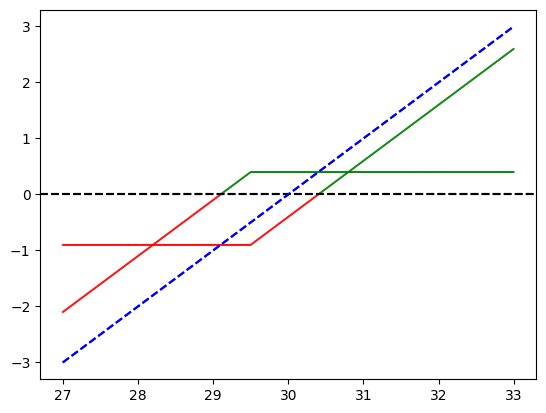

In [237]:
make_graph(x, Put('sell', -0.5, 0.4))
make_graph(x, Put('buy', -0.5, 0.4))

**Interpretation**: 
Recall that when we sell the put we accept to buy at x price. Here, price agreed to is 29.5.

When price is **>29.5** then it makes no sense to "force" us to buy assets for 29.5$ 
since the client can just sell it to anyone else on the open market. 
Thus, we only **keep the premium** and **do not get assigned**.

When price is **<29.5** then it makes sence from the buyer to execute the option because now, 
the price on the open market is smaller, thus we have to buy from him for 30 even tho, currently it is valued lower than this.
Thus, **we buy shares**, and are exposed to the drop in price.

**Notice**, there is a period where the premium counteracts the effect of the drop in price

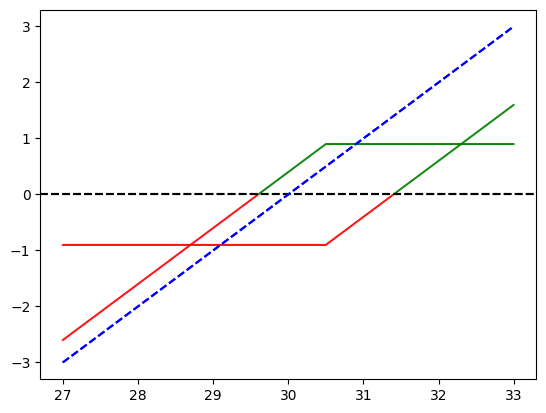

In [238]:
make_graph(x, Call('sell', 0.5, 0.4))
make_graph(x, Call('buy', 0.5, 0.4))

**Interpretation**: 
Recall that when we sell the call we accept to buy at x price. Here, price agreed to is 30.5.

When price is **<30.5** then it makes no sense to "force" us to sell assets for 30.5$ 
since the client can just buy it to anyone else on the open market. 
Thus, we only **keep the premium** and **do not sell**.

When price is **>30.5** then it makes sence from the buyer to execute the option because now, 
the price on the open market is bigger, thus we have to sell from him for 30 even tho, currently it is valued lower than this.
Thus, **we sell shares**, and are **not exposed** to the increase in price.

**Notice**, there is a period where the premium counteracts the effect of the drop in price

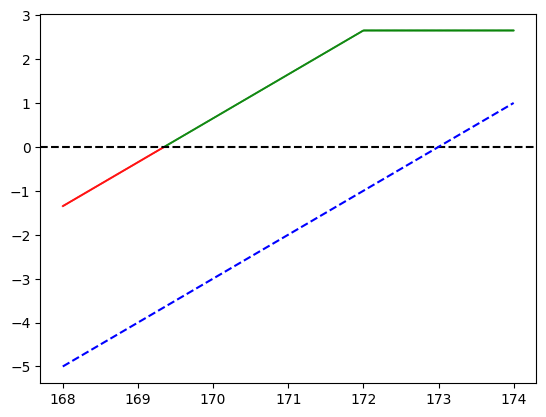

In [244]:
make_graph(x-2, Put('sell', -1, 2.65), 173)

Max gain starts at 172 usd and equals 265 usd. If stock goes up or down, from 173 to 172 we get 265 usd.

We start taking a loss at around 169.

so, %move needed to triger:

In [247]:
(173/172 - 1) * 100

0.5813953488372103

Total money needed:

In [248]:
173*100

17300

if successful, the percent gained:

In [254]:
265/17300*100

1.5317919075144508

That is not much, but actually, when we consider this is over a week, there are 52 weeks so:

In [265]:
def compound_interest(principal, rate, time, compounding_frequency):
    """
    Calculate compound interest.

    Parameters:
    - principal: Initial principal amount (float or int)
    - rate: Annual interest rate (as a decimal, e.g., 0.05 for 5%)
    - time: Time in years (float or int)
    - compounding_frequency: Number of times interest is compounded per year (int)

    Returns:
    - Final amount after compound interest (float)
    """
    # Calculate compound interest, but note that the rate is not devided by freq.
    # This is because we would gain the rate each time we place a bet not "over year"
    amount = principal * (1 + rate) ** (compounding_frequency * time)
    
    return amount


(compound_interest(1, 0.01532, 1, 52) - 1) * 100

120.47174378732848

Well, a 120% return is not bad!

But obviously this is a happy ending, we don't consider the 

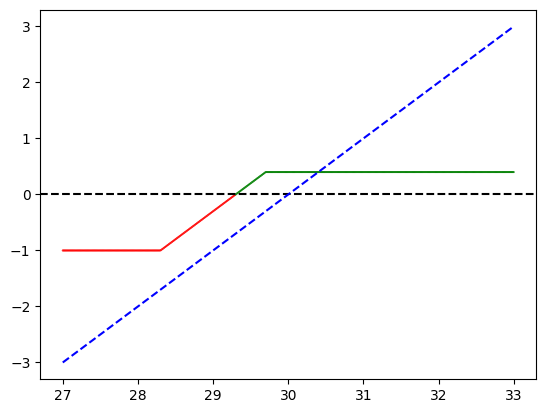

In [8]:
make_graph(x, pipe(
    Put('sell', -0.3, 0.8),
    Put('buy', -0.6, 0.4)
))

In [10]:
x[::10]

array([-3.        , -2.88258317, -2.76516634, -2.64774951, -2.53033268,
       -2.41291585, -2.29549902, -2.17808219, -2.06066536, -1.94324853,
       -1.8258317 , -1.70841487, -1.59099804, -1.47358121, -1.35616438,
       -1.23874755, -1.12133072, -1.00391389, -0.88649706, -0.76908023,
       -0.65166341, -0.53424658, -0.41682975, -0.29941292, -0.18199609,
       -0.06457926,  0.05283757,  0.1702544 ,  0.28767123,  0.40508806,
        0.52250489,  0.63992172,  0.75733855,  0.87475538,  0.99217221,
        1.10958904,  1.22700587,  1.3444227 ,  1.46183953,  1.57925636,
        1.69667319,  1.81409002,  1.93150685,  2.04892368,  2.16634051,
        2.28375734,  2.40117417,  2.518591  ,  2.63600783,  2.75342466,
        2.87084149,  2.98825832])

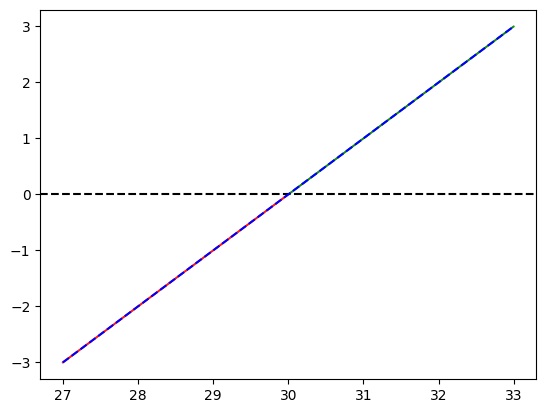

In [21]:
f = Stock
make_graph(x, f)

In [27]:
g = Put('sell', 0, 1)

In [29]:
h = Put('buy',-1,0.5)

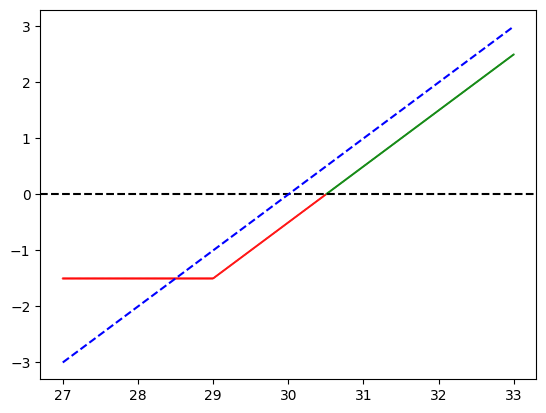

In [30]:
make_graph(x, h)

In [38]:
y = f(x)
y = g(y)
y = h(y)
y

array([-1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -

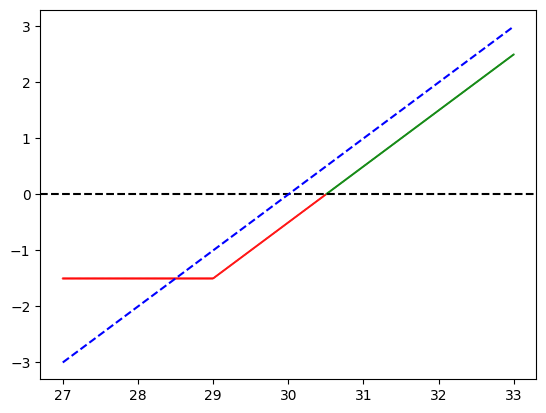

In [35]:
make_graph(x, y)

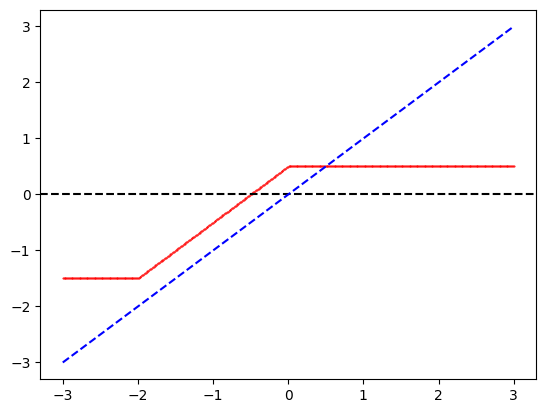

In [42]:
plt.scatter(x, y, color='red', s=0.2)
plt.axhline(y=0, color='black', linestyle='--')
plt.plot(x, Stock(x), color='blue', linestyle='--')

In [43]:
y

array([-1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -